In [2]:
%load_ext autoreload
%autoreload 2

import os
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [3]:
signal_trees = TreeIter(list(map(Tree,fc.eightb.accstudies_no_pu.signal_list)))
signal_trees_pu = TreeIter(list(map(Tree,fc.eightb.accstudies.signal_list)))

# signal_trees.extend(kwargs=lambda tree : dict(n_ext_jet=tree.n_jet-tree.nfound_presel))
# signal_trees.extend(kwargs=eightb.reco_all)
# signal_trees.extend(kwargs=eightb.reco_res_all)

In [4]:
def get_point(label):
    label = label.split('_')
    return str((int(label[1]),int(label[3])))
signal_points = list(map(get_point,signal_trees.sample))

In [5]:
dout = "gen_studies/recojets/"

tree = signal_trees[-2]
tree_pu = signal_trees_pu[-2]

In [6]:
signal_trees.extend(kwargs=lambda t : dict(
    n_ext_jets = t.n_jet - t.nfound_presel
))
signal_trees_pu.extend(kwargs=lambda t : dict(
    n_ext_jets = t.n_jet - t.nfound_presel
))

[None, None, None, None, None, None, None, None]

In [7]:
varinfo.clear()

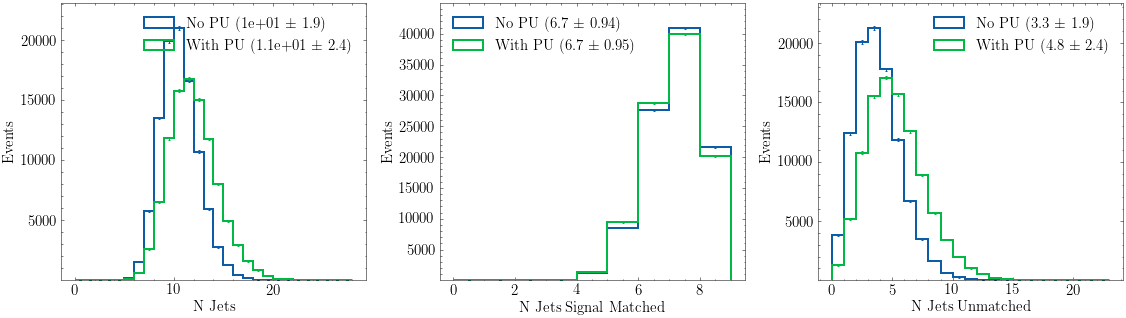

In [8]:
varlist = ['n_jet','nfound_all','n_ext_jets']
xlabels = ['N Jets','N Jets Signal Matched','N Jets Unmatched']
study.quick(
    [tree,tree_pu],
    varlist=varlist,
    scale=False,
    s_label_stat = 'mean_stdv',
    labels=["No PU","With PU"],
    s_colors=[None],
    dim=(-1,3),
    xlabels=xlabels
)

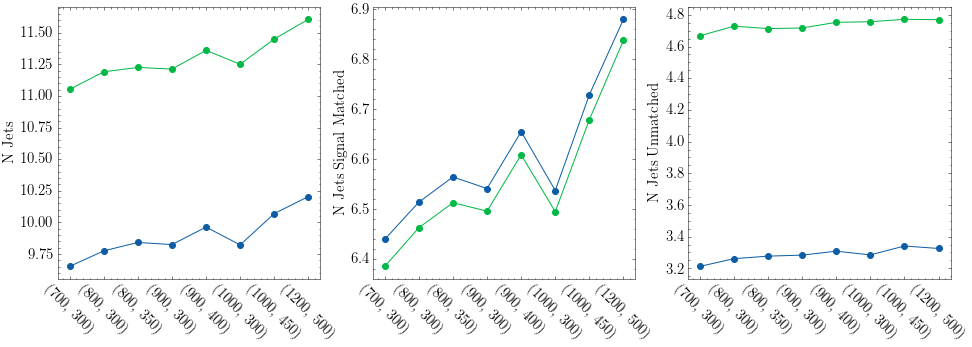

In [9]:
fig,axs = plt.subplots(ncols=3,figsize=(16,5))

for i,(var,xlabel) in enumerate(zip(varlist,xlabels)):
    array = np.array([ get_avg_std(t[var]) for t in signal_trees ])
    array_pu = np.array([ get_avg_std(t[var]) for t in signal_trees_pu ])
    
    graph_multi(signal_points,[array[:,0],array_pu[:,0]],xlabel=signal_points,ylabel=xlabel,figax=(fig,axs[i]))

In [10]:
signal_trees.extend(kwargs= lambda t : {
    f'n_{label}_btag':ak.sum(t.jet_btag > wp,axis=-1)
    for wp,label in zip(jet_btagWP,wplabels)
})
signal_trees_pu.extend(kwargs= lambda t : {
    f'n_{label}_btag':ak.sum(t.jet_btag > wp,axis=-1)
    for wp,label in zip(jet_btagWP,wplabels)
})

[None, None, None, None, None, None, None, None]

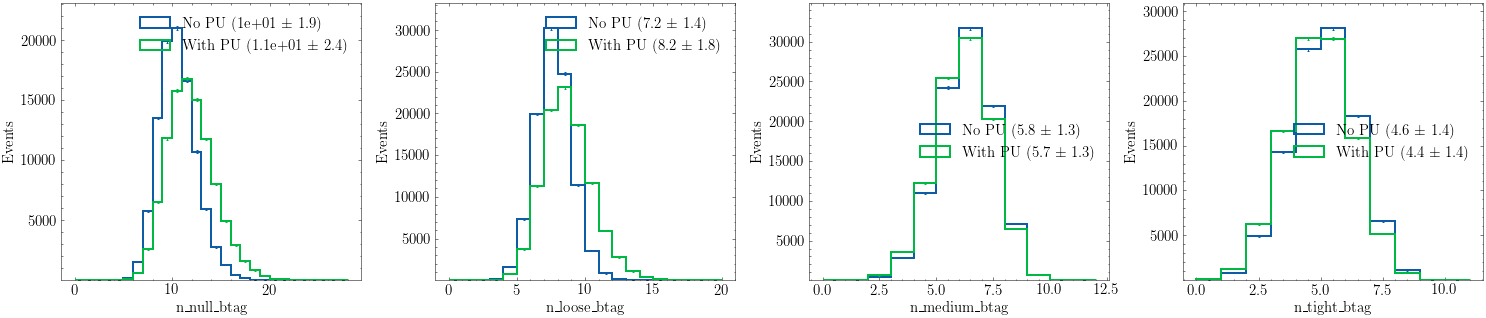

In [11]:
varlist = [f'n_{label}_btag' for label in wplabels]
study.quick(
    [tree,tree_pu],
    varlist=varlist,
    scale=False,
    s_label_stat = 'mean_stdv',
    labels=["No PU","With PU"],
    s_colors=[None],
    dim=(-1,4),
)

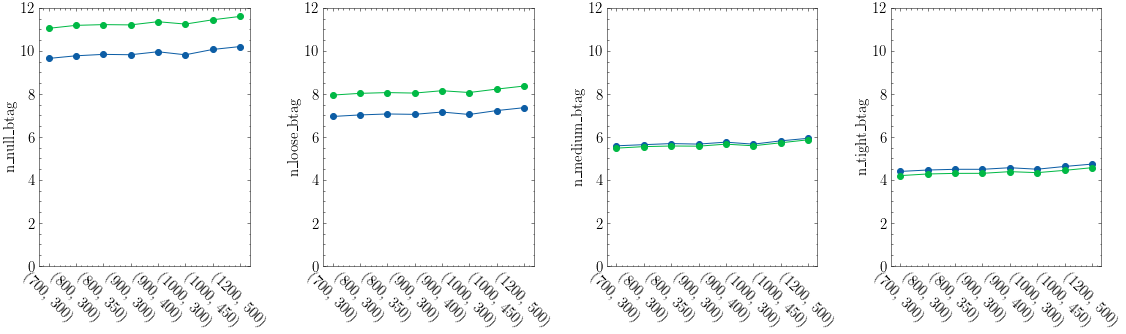

In [12]:
fig,axs = plt.subplots(ncols=4,figsize=(16,5))

for i,(var,xlabel) in enumerate(zip(varlist,varlist)):
    array = np.array([ get_avg_std(t[var]) for t in signal_trees ])
    array_pu = np.array([ get_avg_std(t[var]) for t in signal_trees_pu ])
    
    graph_multi(signal_points,[array[:,0],array_pu[:,0]],xlabel=signal_points,ylim=(0,12),ylabel=xlabel,figax=(fig,axs[i]))
fig.tight_layout()
    

In [13]:
signal_trees.extend(kwargs= lambda t : {
    f'n_matched_{label}_btag':ak.sum((t.jet_signalId > -1) & (t.jet_btag > wp),axis=-1)
    for wp,label in zip(jet_btagWP,wplabels)
})
signal_trees_pu.extend(kwargs= lambda t : {
    f'n_matched_{label}_btag':ak.sum((t.jet_signalId > -1) & (t.jet_btag > wp),axis=-1)
    for wp,label in zip(jet_btagWP,wplabels)
})

[None, None, None, None, None, None, None, None]

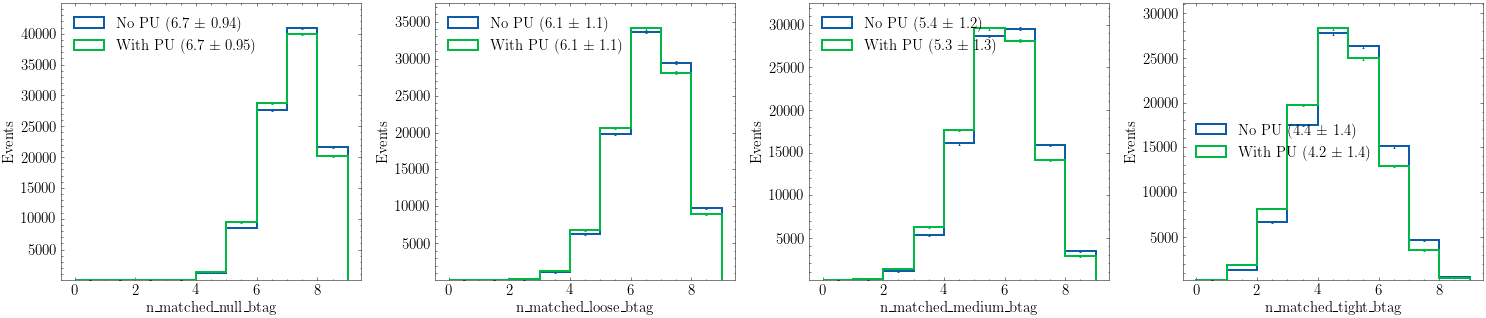

In [14]:
varlist = [f'n_matched_{label}_btag' for label in wplabels]
study.quick(
    [tree,tree_pu],
    varlist=varlist,
    scale=False,
    s_label_stat = 'mean_stdv',
    labels=["No PU","With PU"],
    s_colors=[None],
    dim=(-1,4),
)

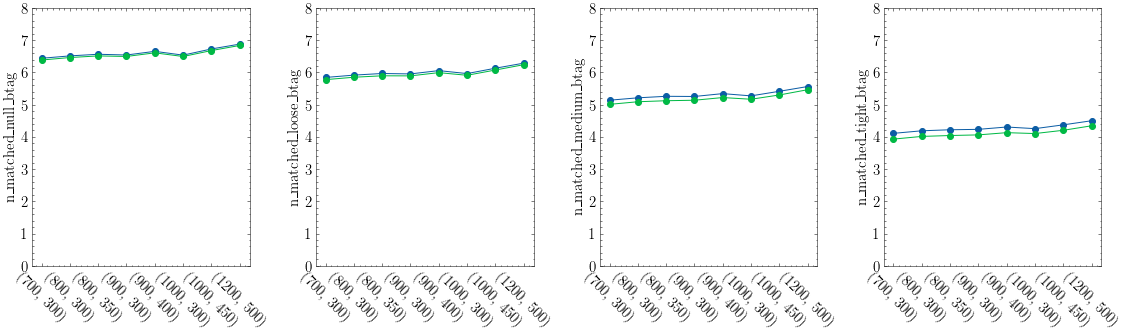

In [15]:
fig,axs = plt.subplots(ncols=4,figsize=(16,5))

for i,(var,xlabel) in enumerate(zip(varlist,varlist)):
    array = np.array([ get_avg_std(t[var]) for t in signal_trees ])
    array_pu = np.array([ get_avg_std(t[var]) for t in signal_trees_pu ])
    
    graph_multi(signal_points,[array[:,0],array_pu[:,0]],xlabel=signal_points,ylim=(0,8),ylabel=xlabel,figax=(fig,axs[i]))
fig.tight_layout()
    

In [16]:
signal_trees.extend(kwargs= lambda t : {
    f'n_unmatched_{label}_btag':ak.sum((t.jet_signalId == -1) & (t.jet_btag > wp),axis=-1)
    for wp,label in zip(jet_btagWP,wplabels)
})
signal_trees_pu.extend(kwargs= lambda t : {
    f'n_unmatched_{label}_btag':ak.sum((t.jet_signalId == -1) & (t.jet_btag > wp),axis=-1)
    for wp,label in zip(jet_btagWP,wplabels)
})

[None, None, None, None, None, None, None, None]

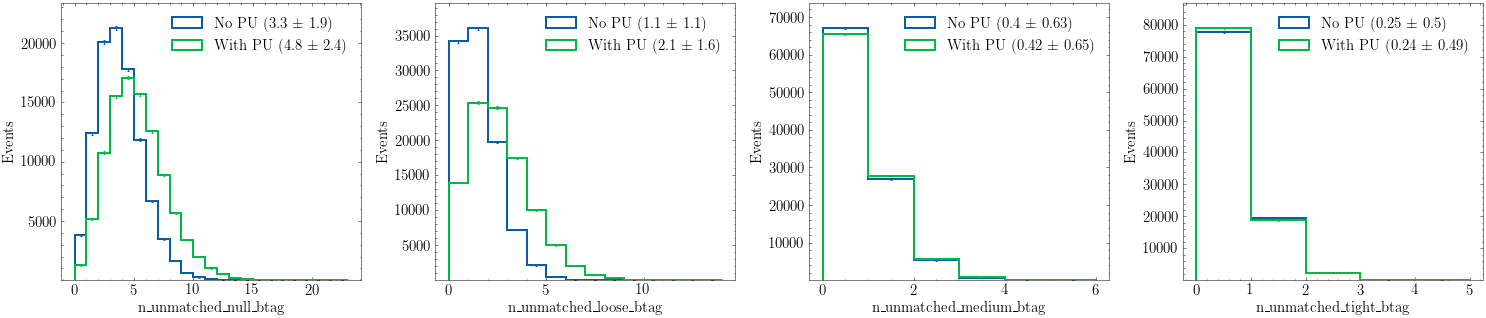

In [17]:
varlist = [f'n_unmatched_{label}_btag' for label in wplabels]
study.quick(
    [tree,tree_pu],
    varlist=varlist,
    scale=False,
    s_label_stat = 'mean_stdv',
    labels=["No PU","With PU"],
    s_colors=[None],
    dim=(-1,4),
)

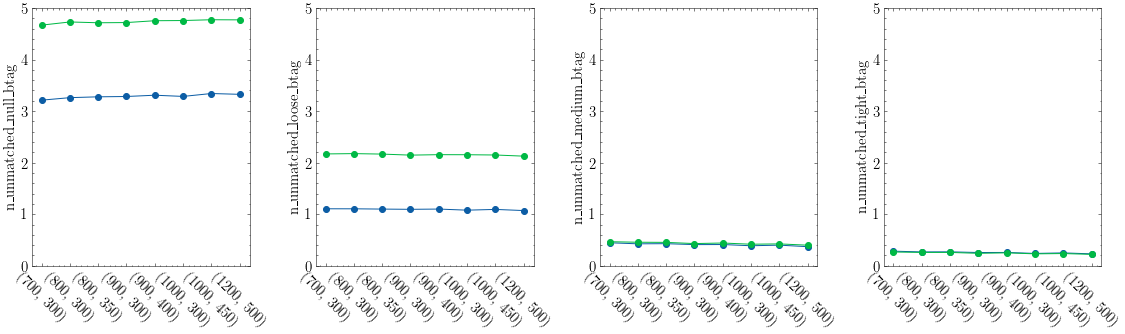

In [19]:
fig,axs = plt.subplots(ncols=4,figsize=(16,5))

for i,(var,xlabel) in enumerate(zip(varlist,varlist)):
    array = np.array([ get_avg_std(t[var]) for t in signal_trees ])
    array_pu = np.array([ get_avg_std(t[var]) for t in signal_trees_pu ])
    
    graph_multi(signal_points,[array[:,0],array_pu[:,0]],xlabel=signal_points,ylim=(0,5),ylabel=xlabel,figax=(fig,axs[i]))
fig.tight_layout()
    

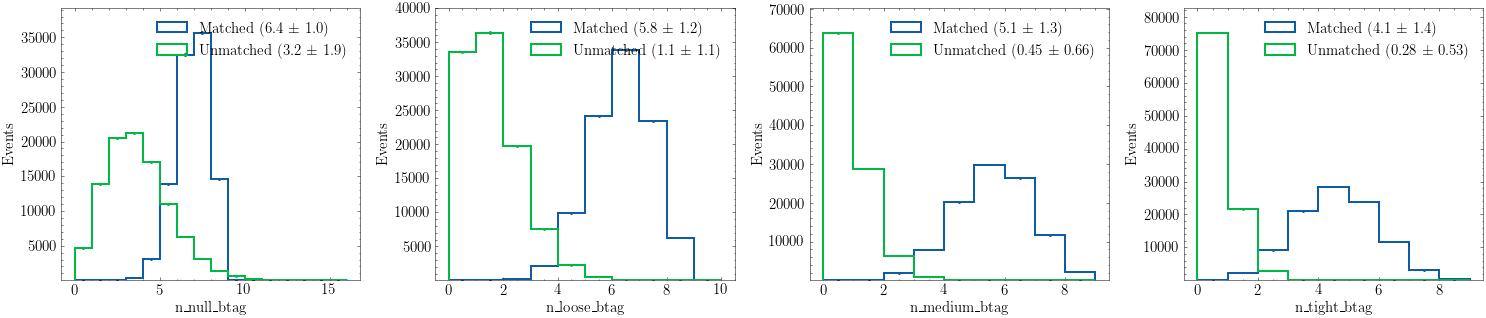

In [20]:
varlist = [ [f'n_{t}_{label}_btag' for t in ('matched','unmatched')] for label in wplabels]
xlabels = [ f'n_{label}_btag' for label in wplabels ]
study.overlay(
    [signal_trees[0]],
    varlist=varlist,
    scale=False,
    s_label_stat = 'mean_stdv',
    labels=["Matched","Unmatched"],
    xlabels=xlabels,
    s_colors=[None],
    dim=(-1,4),
)

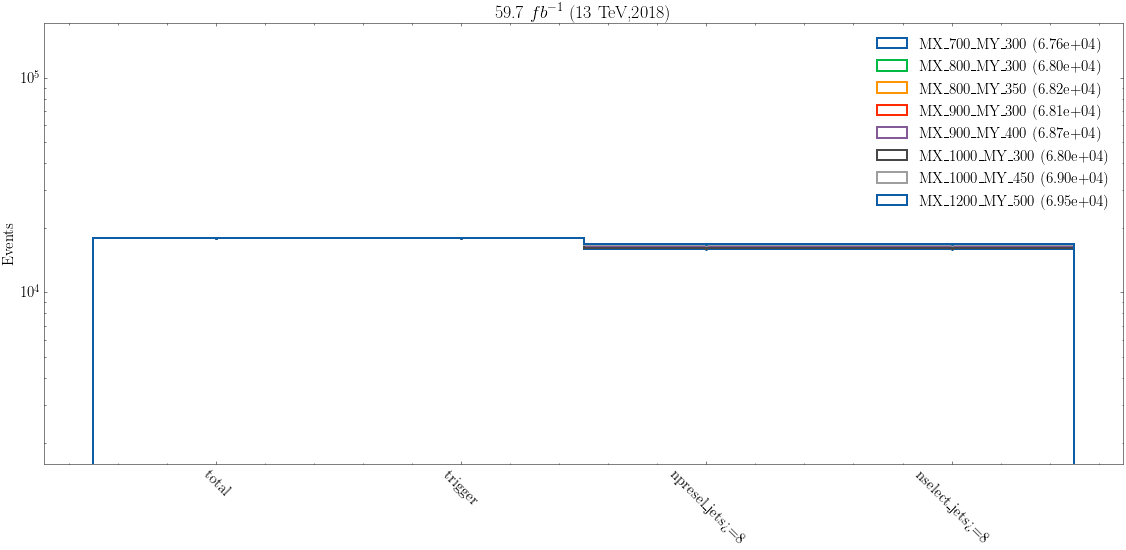

In [21]:
study.cutflow(signal_trees,s_colors=[None])

In [22]:
tree.fields

['Run',
 'LumiSec',
 'Event',
 'n_other_pv',
 'rhofastjet_all',
 'gen_X_fc_m',
 'gen_X_fc_pt',
 'gen_X_fc_eta',
 'gen_X_fc_phi',
 'gen_X_m',
 'gen_X_pt',
 'gen_X_eta',
 'gen_X_phi',
 'gen_Y1_m',
 'gen_Y1_pt',
 'gen_Y1_eta',
 'gen_Y1_phi',
 'gen_Y2_m',
 'gen_Y2_pt',
 'gen_Y2_eta',
 'gen_Y2_phi',
 'gen_H1Y1_m',
 'gen_H1Y1_pt',
 'gen_H1Y1_eta',
 'gen_H1Y1_phi',
 'gen_H2Y1_m',
 'gen_H2Y1_pt',
 'gen_H2Y1_eta',
 'gen_H2Y1_phi',
 'gen_H1Y2_m',
 'gen_H1Y2_pt',
 'gen_H1Y2_eta',
 'gen_H1Y2_phi',
 'gen_H2Y2_m',
 'gen_H2Y2_pt',
 'gen_H2Y2_eta',
 'gen_H2Y2_phi',
 'gen_H1Y1_b1_m',
 'gen_H1Y1_b1_pt',
 'gen_H1Y1_b1_eta',
 'gen_H1Y1_b1_phi',
 'gen_H1Y1_b2_m',
 'gen_H1Y1_b2_pt',
 'gen_H1Y1_b2_eta',
 'gen_H1Y1_b2_phi',
 'gen_H2Y1_b1_m',
 'gen_H2Y1_b1_pt',
 'gen_H2Y1_b1_eta',
 'gen_H2Y1_b1_phi',
 'gen_H2Y1_b2_m',
 'gen_H2Y1_b2_pt',
 'gen_H2Y1_b2_eta',
 'gen_H2Y1_b2_phi',
 'gen_H1Y2_b1_m',
 'gen_H1Y2_b1_pt',
 'gen_H1Y2_b1_eta',
 'gen_H1Y2_b1_phi',
 'gen_H1Y2_b2_m',
 'gen_H1Y2_b2_pt',
 'gen_H1Y2_b2_eta',
 '